Here we provide the code that produces the three figures of our explanatory analysis of the NYC crime dataset in our report.

In [1]:
# Loading the dataset and required libraries
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')


# Importing the dataset
nyc_df = pd.read_csv('/content/drive/My Drive/NYPD_Complaint_Data_Historic.csv')

Mounted at /content/drive


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
# Checking the number of the available data and features

print("Number of reports (rows): ", nyc_df.shape[0])

print("Features (columns): ", nyc_df.shape[1])

Number of reports (rows):  7825499
Features (columns):  35


In [4]:
# Renaming the features for the sake of presentation

df_clean = nyc_df.replace({
                'HARRASSMENT 2': 'Harassments', 
                'ASSAULT 3 & RELATED OFFENSES': 'Assults',
                'CRIMINAL MISCHIEF & RELATED OF': 'Criminal Mischief',
                'PETIT LARCENY': 'Petit Larceny',
                'GRAND LARCENY': 'Grand Larceny',
                'BROOKLYN':'Brooklyn',
                'MANHATTAN':'Manhattan', 'BRONX':'Bronx', 'QUEENS':'Queens', 'STATEN ISLAND':'Staten Island',
                  }).copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

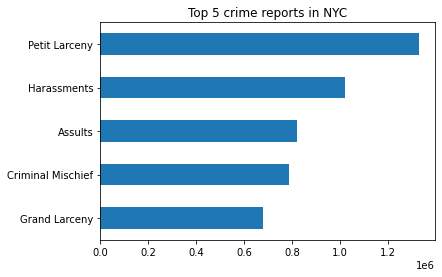

In [5]:
# Fig. 1(a)


ax = df_clean.OFNS_DESC.value_counts().iloc[:5].sort_values().plot(kind="barh", title = "Top 5 crime reports in NYC")
from google.colab import files
ax.get_figure().savefig('output.pdf', format='pdf', bbox_inches='tight')
files.download('output.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

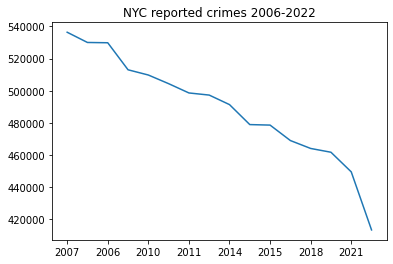

In [6]:
# Fig. 1(b)


df_clean['year'] = df_clean['RPT_DT'].str.findall(r'(\d{4})').apply(lambda x: x[0])
ax=df_clean['year'].value_counts().plot(kind="line", title = "NYC reported crimes 2006-2022")
ax.get_figure().savefig('output2.pdf', format='pdf', bbox_inches='tight')
files.download('output2.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

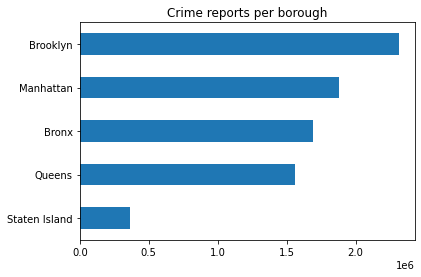

In [7]:
# Fig. 2


ax=df_clean['BORO_NM'].value_counts().sort_values().plot(kind="barh", title = 'Crime reports per borough')
ax.get_figure().savefig('output.pdf', format='pdf', bbox_inches='tight')
files.download('output.pdf')